# LAB 1: Explore pre-trained word vectors. Explore word relationships using vector arithmetic. Perform arithmetic operations and analyze results.

# Step 1: Import Required Libraries

In [ ]:
import os
import gensim.downloader as api
import numpy as np
from gensim.models import KeyedVectors
from google.colab import drive

# Step 2: Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define model path in Google Drive

In [ ]:
model_path = "/content/drive/My Drive/word2vec-google-news-300.model"

# Step 3: Load or Download the Word2Vec Model

In [ ]:
if os.path.exists(model_path):
  print("Model found in Google Drive..Loading")
  word_vectors = KeyedVectors.load(model_path)
else:
  print("Model not found. Downloading Word2Vec model...")
  word_vectors = api.load("word2vec-google-news-300")
  print("Saving model to Google Drive for future use...")
  word_vectors.save(model_path)
  print("Model saved successfully")
  print("\nModel Loaded Successfully\n")

Model not found. Downloading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Saving model to Google Drive for future use...
Model saved successfully

Model Loaded Successfully



# Step 4: Find Similar Words

In [ ]:
print("Top 5 words similar to 'computer':")
similar_words = word_vectors.most_similar("computer", topn=5)
for word, similarity in similar_words:
  print(f"{word}: {similarity:.4f}")

Top 5 words similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082


# Step 5: Word Vector Arithmetic

In [ ]:
print("\nPerforming Vector Arithmetic: 'king - man + woman'")
# king - man + woman = ?
result = word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Result: {result[0][0]}")  # Expected output: 'queen'


Performing Vector Arithmetic: 'king - man + woman'
Result: queen


# Step 6: More Arithmetic Operations

In [ ]:
print("\n More Examples of Vector Arithmetic:")
examples = [
("Paris", "France", "Italy"),
("Einstein", "scientist", "painter")
]
for w1, w2, w3 in examples:
  result = word_vectors.most_similar(positive=[w1, w3], negative=[w2], topn=1)
  print(f"{w1} - {w2} + {w3} = {result[0][0]}")


 More Examples of Vector Arithmetic:
Paris - France + Italy = Milan
Einstein - scientist + painter = Picasso


# Step 7: Visualizing Word Embeddings using PCA

# Apply PCA (300D → 2D)

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition

def plot_embeddings(word_list):
  """Function to reduce 300D word vectors to 2D using PCA and plot them."""
  vectors = np.array([word_vectors[word] for word in word_list])
  return vectors # Return the vectors

# Example usage:
word_list = ["king", "queen", "man", "woman"] # Define a list of words
vectors = plot_embeddings(word_list) # Call the function to create vectors

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors) # Now vectors is defined and can be used

 # Plot the words in 2D space

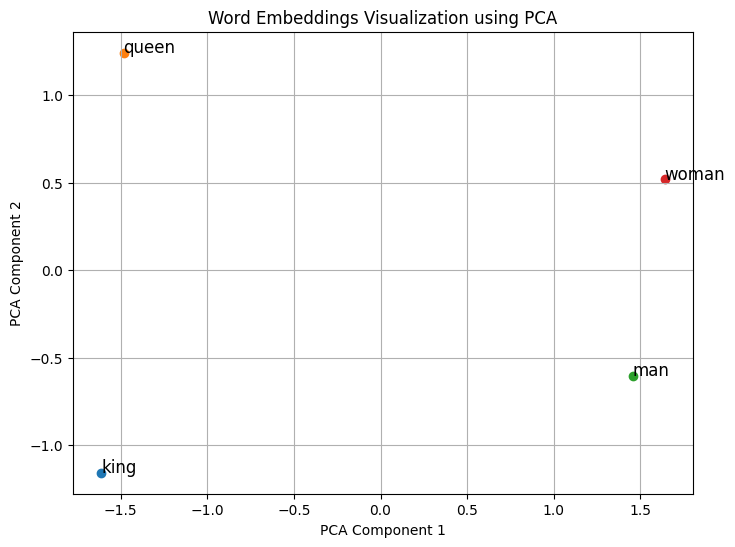

In [ ]:
!pip install scikit-learn matplotlib  # Install scikit-learn and matplotlib
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition
import matplotlib.pyplot as plt # Import the pyplot module for plotting

def plot_embeddings(word_list):
  """Function to reduce 300D word vectors to 2D using PCA and plot them."""
  vectors = np.array([word_vectors[word] for word in word_list])
  return vectors # Return the vectors

# Example usage:
word_list = ["king", "queen", "man", "woman"] # Define a list of words
vectors = plot_embeddings(word_list) # Call the function to create vectors

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors) # Now vectors is defined and can be used

# Plot the words in 2D space
plt.figure(figsize=(8,6)) # Now plt is defined and can be used
for i, word in enumerate(word_list):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Step 8: Select Words for Visualization & Plot

In [ ]:
word_list = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'emperor', 'throne',
'crown', 'ruler']
print("\nVisualizing Word Embeddings using PCA...")
plot_embeddings(word_list)


Visualizing Word Embeddings using PCA...


array([[ 0.12597656,  0.02978516,  0.00860596, ..., -0.0859375 ,
         0.09130859,  0.25195312],
       [ 0.00524902, -0.14355469, -0.06933594, ..., -0.046875  ,
         0.16308594,  0.15429688],
       [ 0.32617188,  0.13085938,  0.03466797, ..., -0.30273438,
        -0.08007812,  0.02099609],
       ...,
       [ 0.13964844,  0.07421875, -0.11669922, ...,  0.06445312,
         0.12207031,  0.20410156],
       [-0.20117188,  0.1953125 ,  0.01953125, ..., -0.17480469,
         0.12158203,  0.08935547],
       [ 0.05688477,  0.00210571,  0.18359375, ...,  0.15234375,
        -0.06225586,  0.22558594]], dtype=float32)